In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [69]:
Aquifer_Auser = pd.read_csv('./datasets/Aquifer_Auser.csv')

In [70]:
Aquifer_Auser

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
8150,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
8151,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829.936207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03
8152,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.90,0.0,23.60,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.23,-1.02


In [71]:
Aquifer_Auser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [72]:
Aquifer_Auser.shape

(8154, 27)

### Filled Entries

<AxesSubplot:>

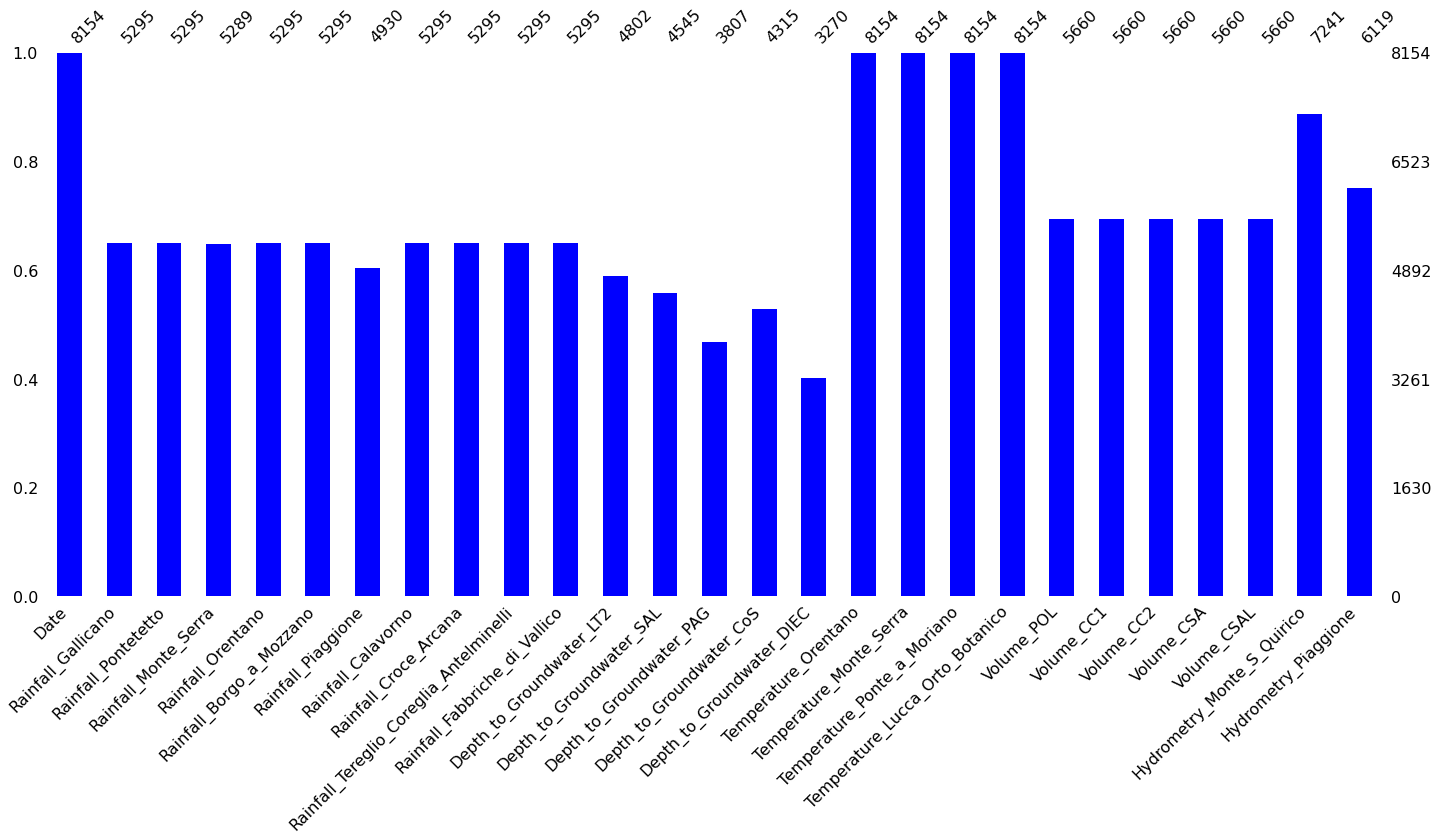

In [73]:
msno.bar(Aquifer_Auser,color='b')

### Dates starting and ending values

In [74]:
print('starting date:', Aquifer_Auser.Date.values[[0,-1]][0])
print('ending date:', Aquifer_Auser.Date.values[[0,-1]][1])


starting date: 05/03/1998
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

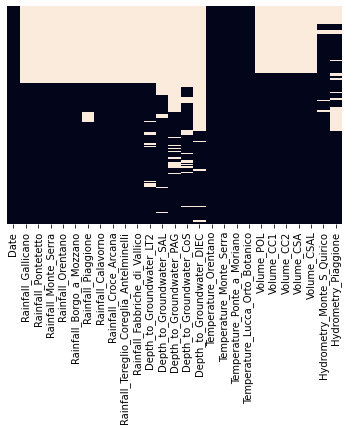

In [75]:
sns.heatmap(Aquifer_Auser.isnull(),yticklabels=False,cbar=False)

In [76]:
Aquifer_Auser.drop(Aquifer_Auser.index[0:2860], inplace=True)

<AxesSubplot:>

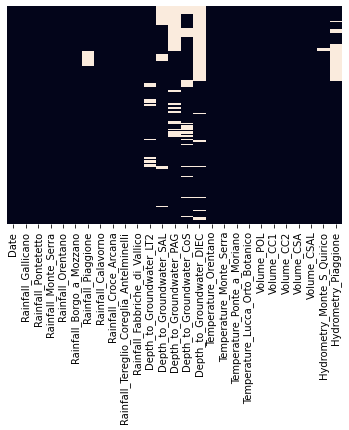

In [77]:
sns.heatmap(Aquifer_Auser.isnull(),yticklabels=False,cbar=False)

In [78]:
data=Aquifer_Auser.copy()
data.drop('Date',axis=1,inplace=True)

### Feature Selection

<AxesSubplot:>

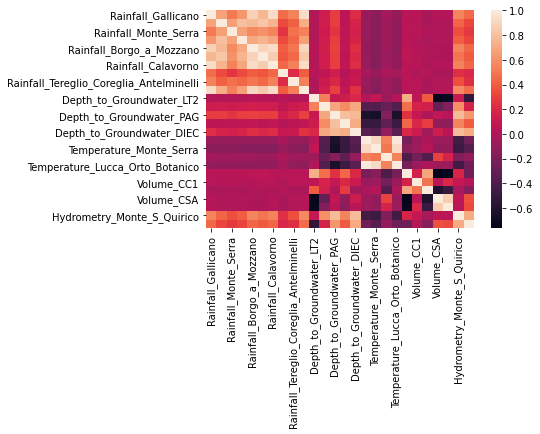

In [79]:
sns.heatmap(data.corr())

In [80]:
features_nan=[features for features in Aquifer_Auser.columns if Aquifer_Auser[features].isnull().sum()>1 and Aquifer_Auser[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(Aquifer_Auser[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Monte_Serra 0.1133 % missing 
Rainfall_Piaggione 6.8946 % missing 
Depth_to_Groundwater_LT2 9.3124 % missing 
Depth_to_Groundwater_SAL 14.1481 % missing 
Depth_to_Groundwater_PAG 28.0884 % missing 
Depth_to_Groundwater_CoS 18.4926 % missing 
Depth_to_Groundwater_DIEC 38.232 % missing 
Hydrometry_Monte_S_Quirico 1.7189 % missing 
Hydrometry_Piaggione 19.1915 % missing 


In [81]:
'''
Columns that are going to be dropped


'''

'\nColumns that are going to be dropped\n\n\n'

In [82]:
a = Aquifer_Auser

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Monte_Serra 0.1133 % missing 
Rainfall_Piaggione 6.8946 % missing 
Depth_to_Groundwater_LT2 9.3124 % missing 
Depth_to_Groundwater_SAL 14.1481 % missing 
Depth_to_Groundwater_PAG 28.0884 % missing 
Depth_to_Groundwater_CoS 18.4926 % missing 
Depth_to_Groundwater_DIEC 38.232 % missing 
Hydrometry_Monte_S_Quirico 1.7189 % missing 
Hydrometry_Piaggione 19.1915 % missing 


### Imputation

### 1. Method (Determining which value to input)

- Rainfall_Monte_Serra

In [83]:
a['Rainfall_Monte_Serra'].describe()

count    5288.000000
mean        3.915772
std        10.813620
min         0.000000
25%         0.000000
50%         0.000000
75%         1.600000
max       152.200000
Name: Rainfall_Monte_Serra, dtype: float64

In [84]:
def cal(x):
    null_values=x.isnull().sum()
    count_values=x.value_counts().unique
    mean=x.mean()
    median=x.median()
    mode=x.mode()
    print('null_values: ',null_values,'count_values: ', count_values, 'mean: ',mean,'median: ', median,'mode: ',mode, sep=' \n  ' )
    return

In [85]:
x=a['Rainfall_Monte_Serra']
cal(x)

null_values:  
  6 
  count_values:  
  <bound method Series.unique of 0.0     3146
0.2      365
0.4      148
0.8       91
0.6       81
        ... 
35.8       1
46.8       1
56.2       1
43.6       1
55.0       1
Name: Rainfall_Monte_Serra, Length: 265, dtype: int64> 
  mean:  
  3.915771558245107 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [86]:
a['Rainfall_Monte_Serra']=a['Rainfall_Monte_Serra'].median()

Rainfall_Piaggione

In [87]:
x=a['Rainfall_Piaggione']
cal(x)

null_values:  
  365 
  count_values:  
  <bound method Series.unique of 0.0     3204
0.2      153
0.4       89
0.6       75
1.2       51
        ... 
70.0       1
34.2       1
58.2       1
71.2       1
33.4       1
Name: Rainfall_Piaggione, Length: 280, dtype: int64> 
  mean:  
  3.9476364374112496 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [88]:
a['Rainfall_Piaggione']=a['Rainfall_Piaggione'].median()

Depth_to_Groundwater_LT2

In [89]:
x=a['Depth_to_Groundwater_LT2']
cal(x)

null_values:  
  493 
  count_values:  
  <bound method Series.unique of -12.95    51
-12.69    46
-12.48    42
-12.31    41
-12.94    39
          ..
-15.25     1
-11.75     1
-15.30     1
-15.29     1
-15.31     1
Name: Depth_to_Groundwater_LT2, Length: 362, dtype: int64> 
  mean:  
  -13.371714226202878 
  median:  
  -13.04 
  mode:  
  0   -12.95
dtype: float64


In [90]:
a['Depth_to_Groundwater_LT2']=a['Depth_to_Groundwater_LT2'].mean()

Depth_to_Groundwater_SAL

In [91]:
x=a['Depth_to_Groundwater_SAL']
cal(x)

null_values:  
  749 
  count_values:  
  <bound method Series.unique of -5.65    49
-5.71    45
-5.43    44
-5.76    43
-6.00    42
         ..
-6.90     1
-4.29     1
-3.38     1
-3.97     1
-4.00     1
Name: Depth_to_Groundwater_SAL, Length: 312, dtype: int64> 
  mean:  
  -5.651273927392742 
  median:  
  -5.68 
  mode:  
  0   -5.65
dtype: float64


In [92]:
a['Depth_to_Groundwater_SAL']=a['Depth_to_Groundwater_SAL'].mean()

Depth_to_Groundwater_PAG

In [93]:
x=a['Depth_to_Groundwater_PAG']
cal(x)

null_values:  
  1487 
  count_values:  
  <bound method Series.unique of -1.77    30
-1.82    29
-1.76    29
-2.00    28
-2.90    28
         ..
-0.64     1
-0.44     1
-0.56     1
-0.50     1
-0.35     1
Name: Depth_to_Groundwater_PAG, Length: 298, dtype: int64> 
  mean:  
  -1.9863015497767291 
  median:  
  -1.97 
  mode:  
  0   -1.77
dtype: float64


In [94]:
a['Depth_to_Groundwater_PAG']=a['Depth_to_Groundwater_PAG'].mean()

Depth_to_Groundwater_CoS

In [95]:
x=a['Depth_to_Groundwater_CoS']
cal(x)

null_values:  
  979 
  count_values:  
  <bound method Series.unique of -5.19    29
-5.24    26
-4.90    24
-4.83    23
-4.95    22
         ..
-9.37     1
-9.36     1
-9.24     1
-4.11     1
-9.57     1
Name: Depth_to_Groundwater_CoS, Length: 531, dtype: int64> 
  mean:  
  -6.316783314020861 
  median:  
  -6.25 
  mode:  
  0   -5.19
dtype: float64


In [96]:
a['Depth_to_Groundwater_CoS']=a['Depth_to_Groundwater_CoS'].mean()

Depth_to_Groundwater_DIEC

In [97]:
x=a['Depth_to_Groundwater_DIEC']
cal(x)

null_values:  
  2024 
  count_values:  
  <bound method Series.unique of -4.42    39
-4.41    37
-4.69    34
-4.35    32
-4.68    30
         ..
-2.36     1
-1.88     1
-2.07     1
-2.11     1
-1.86     1
Name: Depth_to_Groundwater_DIEC, Length: 328, dtype: int64> 
  mean:  
  -3.9186391437308936 
  median:  
  -4.06 
  mode:  
  0   -4.42
dtype: float64


In [98]:
a['Depth_to_Groundwater_DIEC']=a['Depth_to_Groundwater_DIEC'].mean()

Hydrometry_Monte_S_Quirico

In [99]:
x=a['Hydrometry_Monte_S_Quirico']
cal(x)

null_values:  
  91 
  count_values:  
  <bound method Series.unique of 0.18    218
0.14    203
0.11    201
0.10    190
0.09    187
       ... 
1.67      1
1.01      1
1.56      1
1.25      1
1.08      1
Name: Hydrometry_Monte_S_Quirico, Length: 143, dtype: int64> 
  mean:  
  0.2947991543340368 
  median:  
  0.23 
  mode:  
  0    0.18
dtype: float64


In [100]:
a['Hydrometry_Monte_S_Quirico']=a['Hydrometry_Monte_S_Quirico'].mean()

Hydrometry_Piaggione

In [101]:
x=a['Hydrometry_Piaggione']
cal(x)

null_values:  
  1016 
  count_values:  
  <bound method Series.unique of -1.07    166
-1.06    165
-1.05    157
-1.01    157
-1.00    145
        ... 
 2.58      1
 3.39      1
 2.96      1
 3.26      1
 2.08      1
Name: Hydrometry_Piaggione, Length: 288, dtype: int64> 
  mean:  
  -0.5988405797101388 
  median:  
  -0.95 
  mode:  
  0   -1.07
dtype: float64


In [102]:
a['Hydrometry_Piaggione']=a['Hydrometry_Piaggione'].median()

In [103]:
a.isnull().sum()

Date                                       0
Rainfall_Gallicano                         0
Rainfall_Pontetetto                        0
Rainfall_Monte_Serra                       0
Rainfall_Orentano                          0
Rainfall_Borgo_a_Mozzano                   0
Rainfall_Piaggione                         0
Rainfall_Calavorno                         0
Rainfall_Croce_Arcana                      0
Rainfall_Tereglio_Coreglia_Antelminelli    0
Rainfall_Fabbriche_di_Vallico              0
Depth_to_Groundwater_LT2                   0
Depth_to_Groundwater_SAL                   0
Depth_to_Groundwater_PAG                   0
Depth_to_Groundwater_CoS                   0
Depth_to_Groundwater_DIEC                  0
Temperature_Orentano                       0
Temperature_Monte_Serra                    0
Temperature_Ponte_a_Moriano                0
Temperature_Lucca_Orto_Botanico            0
Volume_POL                                 0
Volume_CC1                                 0
Volume_CC2